## 1. Setup and Load Data

### `1.1 Installing Dependencies`

In [1]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.3.0
asttokens                    2.0.8
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.9.24
charset-normalizer           2.1.1
colorama                     0.4.5
contourpy                    1.0.5
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
entrypoints                  0.4
executing                    1.1.1
flatbuffers                  22.9.24
fonttools                    4.37.4
gast                         0.4.0
google-auth                  2.13.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.49.1
h5py                         3.7.0
idna                         3.4
importlib-metadata           5.0.0
ipykernel                    6.16.0
ipython                      8.5.0
jedi   


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### `1.2 Importing Dependencies`

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

### `1.3 Loading the Data`

In [4]:
data = tf.keras.utils.image_dataset_from_directory('image_data')

Found 500 files belonging to 5 classes.


In [5]:
# tf.keras.utils.image_dataset_from_directory??       # create batches of 32 images if size 256x256

In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

In [8]:
batch  # type : Tuple

(array([[[[2.43000000e+02, 0.00000000e+00, 0.00000000e+00],
          [2.40105469e+02, 0.00000000e+00, 0.00000000e+00],
          [2.43765625e+02, 0.00000000e+00, 0.00000000e+00],
          ...,
          [2.49292969e+02, 0.00000000e+00, 2.92968750e-01],
          [2.54000000e+02, 0.00000000e+00, 4.92968750e+00],
          [2.54000000e+02, 0.00000000e+00, 3.00000000e+00]],
 
         [[2.40105469e+02, 0.00000000e+00, 0.00000000e+00],
          [2.38141861e+02, 5.58554077e+00, 5.58554077e+00],
          [2.12770020e+02, 7.60568237e+00, 5.78906250e+00],
          ...,
          [2.15693039e+02, 1.32251434e+01, 1.60734406e+01],
          [2.23396362e+02, 8.71751404e+00, 1.08205109e+01],
          [2.30843750e+02, 9.64843750e+00, 1.16835938e+01]],
 
         [[2.51296875e+02, 1.88281250e+00, 2.82421875e+00],
          [2.13034790e+02, 7.67187500e+00, 5.88835144e+00],
          [2.49977188e+02, 1.62199890e+02, 1.56661774e+02],
          ...,
          [2.49080139e+02, 1.52814514e+02, 1.4933

In [9]:
batch[0].shape

(32, 256, 256, 3)

In [10]:
batch[1]

array([4, 3, 0, 3, 1, 1, 2, 4, 1, 4, 2, 1, 1, 0, 3, 1, 0, 0, 1, 2, 1, 4,
       2, 2, 0, 0, 4, 0, 3, 0, 2, 4])

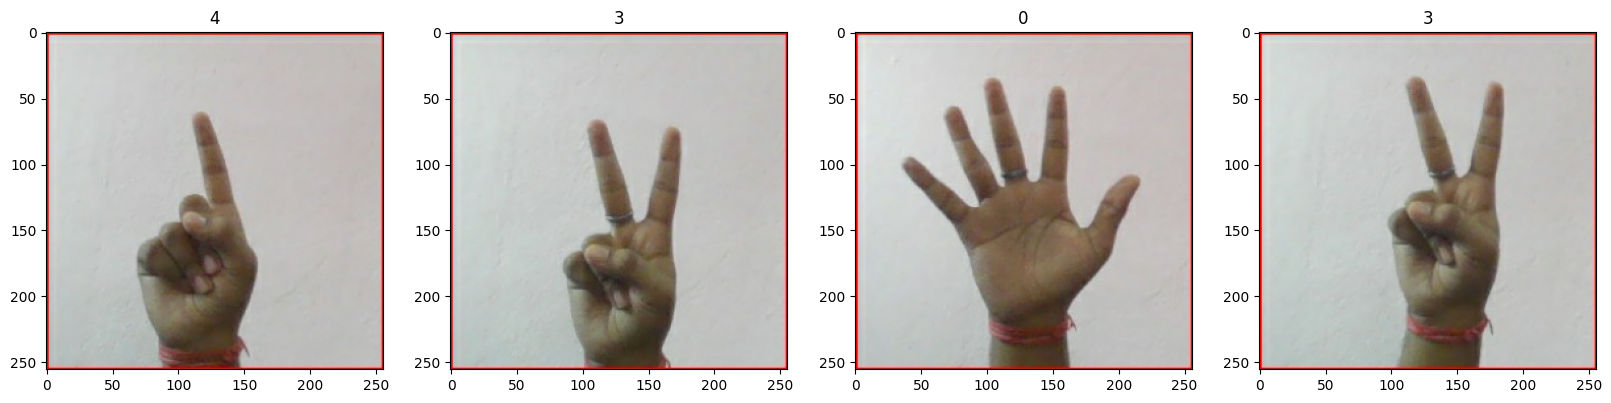

In [11]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

class 0 : Forward

class 1 : None

class 2 : Play-Pause

class 3 : Volume-down

class 4 : Volume-up

## 2. Preprocessing the Data

### `2.1 Scaling the data`

In [12]:
data = data.map(lambda x,y : (x/255,y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[9.49019611e-01, 0.00000000e+00, 0.00000000e+00],
          [9.30101097e-01, 0.00000000e+00, 0.00000000e+00],
          [9.47870731e-01, 0.00000000e+00, 0.00000000e+00],
          ...,
          [9.81081486e-01, 0.00000000e+00, 1.26838237e-02],
          [9.92156863e-01, 0.00000000e+00, 2.71752458e-02],
          [9.92156863e-01, 0.00000000e+00, 1.96078438e-02]],
 
         [[9.49019611e-01, 0.00000000e+00, 0.00000000e+00],
          [9.22799766e-01, 1.82534009e-02, 1.82534009e-02],
          [8.19195330e-01, 2.96045039e-02, 3.31665054e-02],
          ...,
          [8.39296162e-01, 4.47393097e-02, 5.69797307e-02],
          [8.83094609e-01, 3.40533070e-02, 5.35281301e-02],
          [9.01348054e-01, 3.40533070e-02, 4.23100479e-02]],
 
         [[9.71170366e-01, 0.00000000e+00, 0.00000000e+00],
          [8.44948471e-01, 4.02905047e-02, 4.02905047e-02],
          [9.80045974e-01, 6.22811615e-01, 6.12601459e-01],
          ...,
          [9.69428182e-01, 5.76040268e-01, 5.5873

### `2.2 Spliting the Data`

In [14]:
len(data)

16

In [18]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.15)+1
test_size = int(len(data)*0.15)

In [19]:
train_size,val_size,test_size

(11, 3, 2)

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
len(train),len(val),len(test)

(11, 3, 2)

In [23]:
# train.as_numpy_iterator().next()

## `3. Building and Training the Model`

### `3.1 Creating the Neural Network`

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 

In [30]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.compile('adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)      

### `3.2 Training the Model`

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train,epochs=15,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/15
11/11 [==============================] - 13s 1s/step - loss: 1.6097 - accuracy: 0.2415 - val_loss: 1.5615 - val_accuracy: 0.1771
Epoch 2/15
11/11 [==============================] - 12s 1s/step - loss: 1.3622 - accuracy: 0.5284 - val_loss: 1.0712 - val_accuracy: 0.7917
Epoch 3/15
11/11 [==============================] - 11s 1s/step - loss: 0.6072 - accuracy: 0.8722 - val_loss: 0.2307 - val_accuracy: 0.9062
Epoch 4/15
11/11 [==============================] - 11s 1s/step - loss: 0.2185 - accuracy: 0.8977 - val_loss: 0.0910 - val_accuracy: 1.0000
Epoch 5/15
11/11 [==============================] - 11s 966ms/step - loss: 0.0519 - accuracy: 0.9915 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 6/15
11/11 [==============================] - 11s 998ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 7/15
11/11 [==============================] - 11s 1s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/15
11/

In [36]:
hist.history

{'loss': [1.6097297668457031,
  1.3621952533721924,
  0.6072227954864502,
  0.21854566037654877,
  0.05186336115002632,
  0.014592880383133888,
  0.0026792255230247974,
  0.0015177958412095904,
  0.0005089938058517873,
  0.00037994078593328595,
  0.0002775117172859609,
  0.00022134798928163946,
  0.00023473538749385625,
  0.0002167933707823977,
  0.00018842016288544983],
 'accuracy': [0.24147726595401764,
  0.5284090638160706,
  0.8721590638160706,
  0.8977272510528564,
  0.9914772510528564,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.5615352392196655,
  1.0711876153945923,
  0.23067481815814972,
  0.09102741628885269,
  0.015240698121488094,
  0.00629299134016037,
  0.0018050108337774873,
  0.0007138326182030141,
  0.0004111140442546457,
  0.00021130427194293588,
  0.00030379416421055794,
  0.0001330338418483734,
  0.00034005451016128063,
  0.00023137828975450248,
  0.000273195473710075],
 'val_accuracy': [0.1770833283662796,
  0.791666686534

### `3.3 Visualizaing the Trained Model Performance`

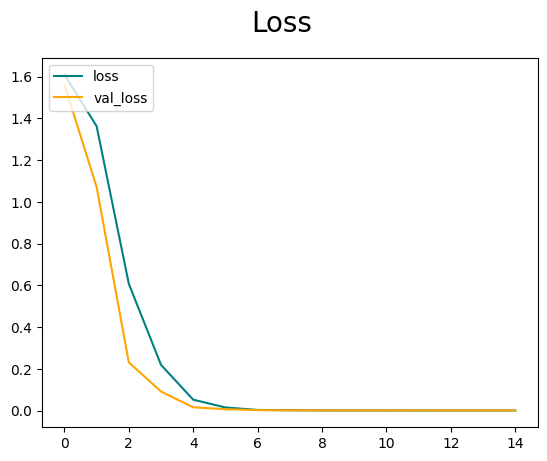

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

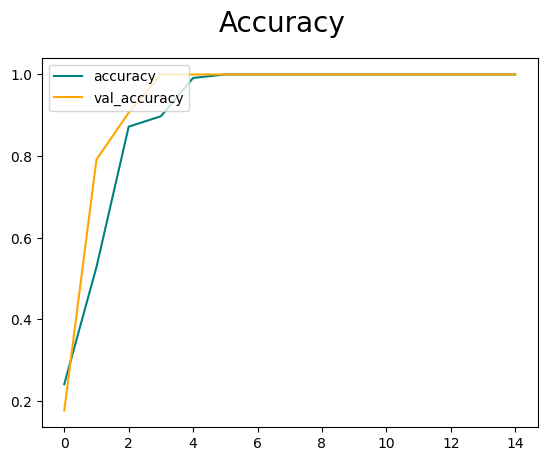

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4. Testing the Model

In [45]:
class_map = {
    0 : 'forward',
    1 : 'none',
    2 : 'play-pause',
    3 : 'volume-down',
    4 : 'volume-up'
}

In [39]:
import cv2

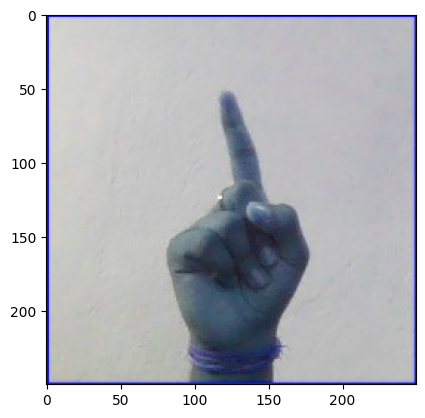

In [58]:
img = cv2.imread('sample_imgs/test5.jpg')
plt.imshow(img)
plt.show()

In [59]:
resize = tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 60ms/step


In [60]:
class_map[yhat.argmax()]

'volume-up'

## 5. Saving the Model and Testing

In [61]:
model.save(os.path.join('models','recognise.h5'))

In [62]:
from tensorflow.keras.models import load_model

In [63]:
new_model = load_model(os.path.join('models','recognise.h5'))

In [66]:
img = cv2.imread('sample_imgs/test2.jpg')
resize = tf.image.resize(img,(256,256))
yhat_new = new_model.predict(np.expand_dims(resize/255,0))
ind = np.argmax(yhat_new[0])
print(class_map[ind])

1/1 [==============================] - 0s 59ms/step
play-pause


In [67]:
img = cv2.imread('sample_imgs/test4.jpg')
resize = tf.image.resize(img,(256,256))
yhat_new = new_model.predict(np.expand_dims(resize/255,0))
ind = np.argmax(yhat_new[0])
print(class_map[ind])

1/1 [==============================] - 0s 60ms/step
volume-down
